<a href="https://colab.research.google.com/github/sleepynayng/DL/blob/main/%5BTensorflow_2_4%5D_Regression_for_Boston_Housing_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Regression for Boston Housing Datasets</h1>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
print(type(train_X), " | <length : [",len(train_X), ",", len(train_Y),"]>\n", sep="")
print(train_X)

<class 'numpy.ndarray'> | <length : [404,404]>

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


In [ ]:
# Standardization 
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X = (train_X - x_mean) / x_std
test_X = (test_X - x_mean) / x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y = (train_Y - y_mean) / y_std
test_Y = (test_Y - y_mean) / y_std

In [ ]:
# Model Structure
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", input_shape=(13,)),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Complie Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss="mse")

# Fitting
history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.2,
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=6, monitor="val_loss")])

Epoch 1/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1140 - val_loss: 0.1617
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 0.0873 - val_loss: 0.1385
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0762 - val_loss: 0.1103
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0661 - val_loss: 0.1038
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0984
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.1167
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0990
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.1097
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0861 - val_loss: 0.1811
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0756 - val_loss: 0.1094
Epoch 11/50
11/11 [

In [ ]:
# Result
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 879us/step - loss: 0.1664


0.16644005477428436

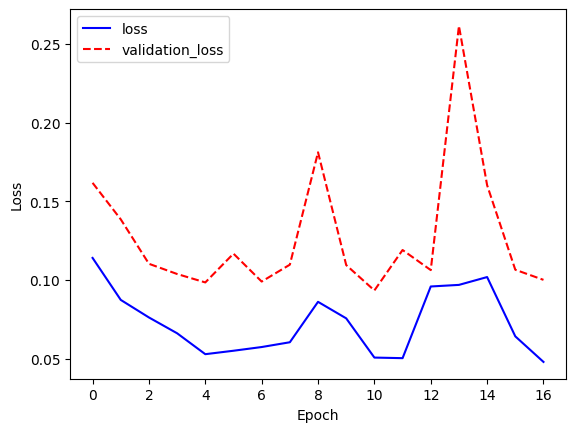

In [ ]:
# Visualization model loss
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="validation_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

4/4 [==============================] - 0s 614us/step


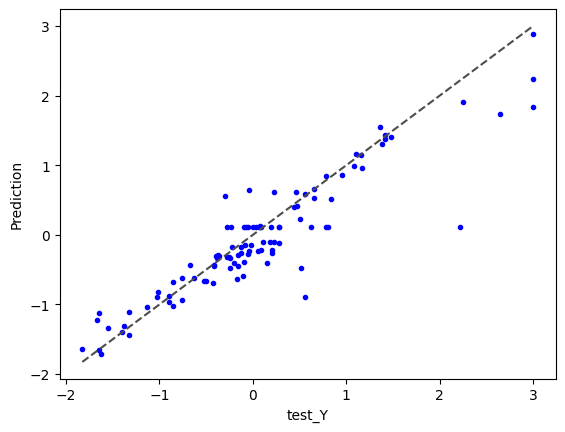

In [ ]:
# Visualization
pred = model.predict(test_X)
plt.plot(test_Y, pred, "b.")
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel("test_Y")
plt.ylabel("Prediction")
plt.show()